<a href="https://colab.research.google.com/github/sp-au-mu-nl/SpeechComm/blob/main/notebook/chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap09.zip
!unzip -o chap09.zip
!rm chap09.zip

--2025-04-23 04:13:22--  https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap09.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap09.zip [following]
--2025-04-23 04:13:23--  https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap09.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799763 (781K) [application/zip]
Saving to: ‘chap09.zip’

chap09.zip          100%[===================>] 781.02K  --.-KB/s    in 0.06s   

2025-04-23 04:13:23 (13.8 MB/s) - ‘chap09.zip’ saved [799763/799763]

Archive:  chap

プログラム 9.1

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy import signal

163.26530612244898


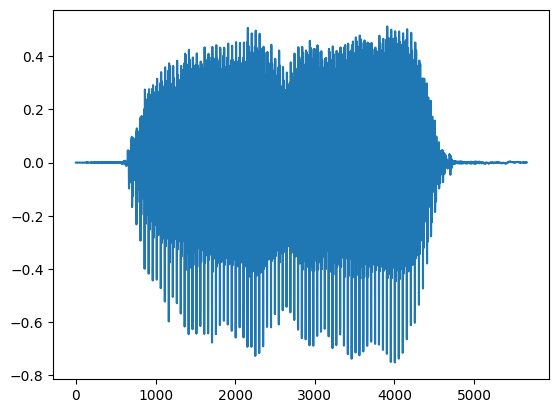

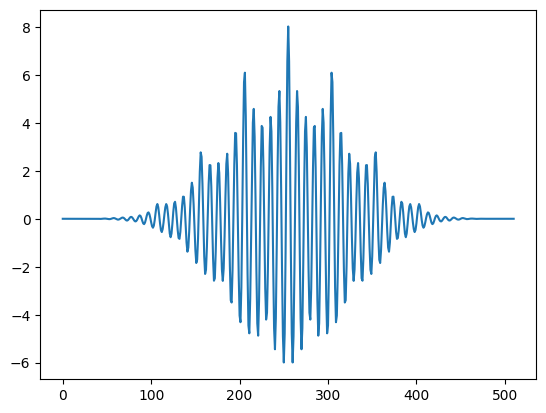

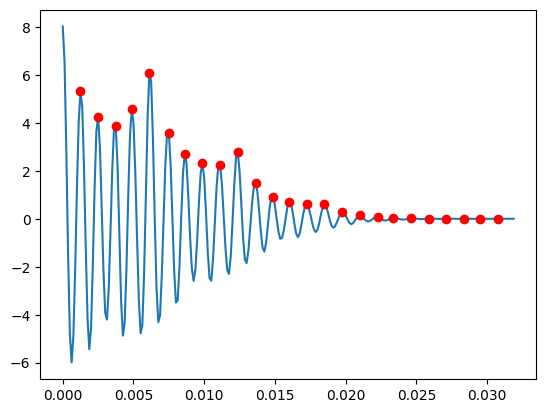

In [3]:
yA, sr = librosa.load('a8k.wav', sr=8000)
plt.plot(yA)
nLag = 256
ySegment = yA[2000+np.arange(nLag)]*np.hanning(nLag)
ac = np.correlate(ySegment, ySegment, 'full')
plt.figure(); plt.plot(ac)
iCenter = len(ySegment)
x = np.arange(iCenter)/sr
acRight = ac[iCenter-1:]
iPeaks, _ = signal.find_peaks(acRight)
plt.figure(); plt.plot(x, acRight)
plt.plot(x[iPeaks], acRight[iPeaks], 'ro')
iMax = np.argmax(acRight[iPeaks])
print(1/x[iPeaks][iMax])

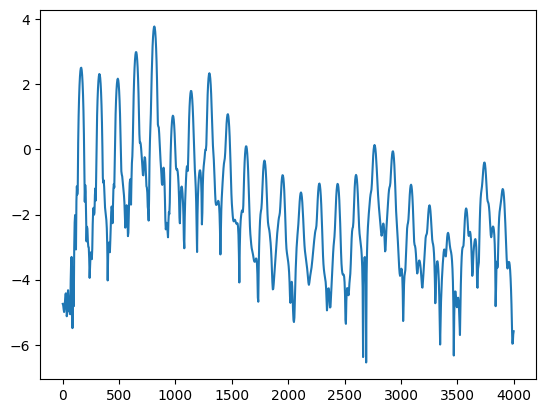

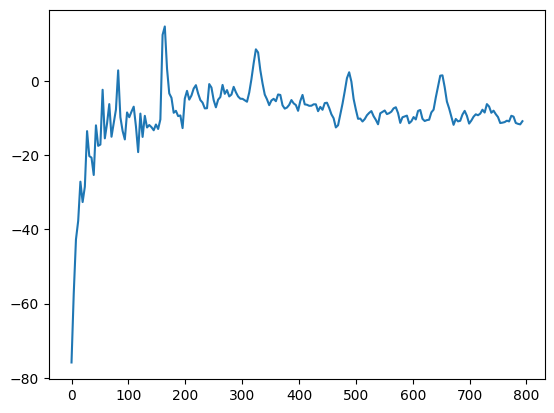

In [4]:
plt.close()
nFrame = 512; nFFT = 2048
ySegment = yA[2000+np.arange(nFrame)]*np.hanning(nFrame)
logS = np.log(np.abs(np.fft.rfft(ySegment, nFFT)))
frequency = np.fft.rfftfreq(nFFT, 1/sr)
plt.plot(frequency, logS)
K = 5
iUpper = round(nFFT/2/K)-1
P = logS[:iUpper]
for r in np.arange(2,K+1):
    index = np.arange(0, iUpper*r, r)
    P += logS[index]
plt.figure()
plt.plot(frequency[:iUpper], P)

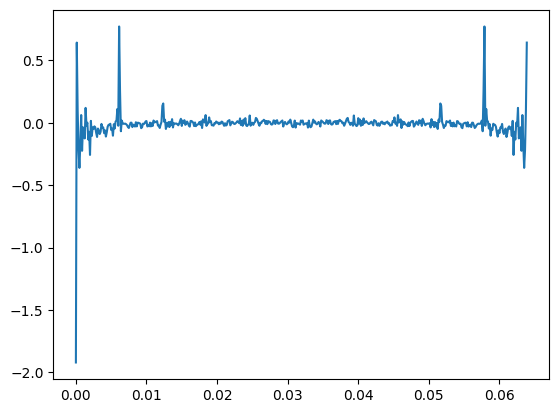

In [5]:
plt.close()
plt.close()
nFFT = 512
cepstrum = np.fft.irfft(np.log(np.abs(np.fft.rfft(ySegment, nFFT))))
t = np.arange(len(cepstrum))/sr
plt.plot(t, cepstrum)